Leverage is defined as the ratio of the size of the portfolio to the actual account equity within that portfolio.

$$ Leverage = \frac{SizeOfPortfolio}{AccountEquity} $$

Assume we have a set of $N$ algorithmic trading strategies and we wish to determine both how to apply optimal leverage per strategy. If we denote the allocation between each strategy $i$ as a vector $f$ of length $N$, such that $ f = (f_1, \dots, f_N) $ then the Kelly Criterion for optimal allocation to each strategy $f$ is given by:

$$ f_i = \frac{\mu_i}{\sigma_i^2} $$

where $\mu_i$ are the mean excess returns, and $\sigma_i$ are the standard deviation of excess returns for strategy $i$. The assumption is that the mean and the standard deviation is stable for the strategy, but since this assumption is not always valide, we can use the sample mean and standard deviation of the past 6 months for computing the Kelly Criterion.

The Kelly Criterion should really be considered as an upper bound of leverage to use, rather than a direct specification. In practice many traders tend to use a more conservative leverage regime such as the Kelly Criterion divided by two.

[ 0.54066805  0.2360283   0.11660484  0.1066988 ]
[ 0.27638339  0.03006307  0.47850085  0.21505269]


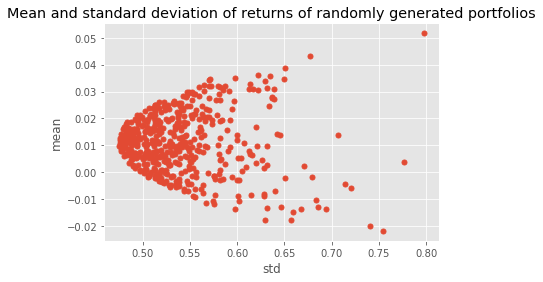

In [8]:
#import cvxopt as opt
#from cvxopt import blas, solvers
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import pandas as pd


## Create static inline plots
%matplotlib inline      

style.use("ggplot")

np.random.seed(123)

# Turn off progress printing 
#solvers.options['show_progress'] = True

## NUMBER OF ASSETS
n_assets = 4

## NUMBER OF OBSERVATIONS
n_obs = 1000

return_vec = np.random.randn(n_assets, n_obs)

#plt.plot(return_vec.T, alpha=.4);
#plt.xlabel('time')
#plt.ylabel('returns')

def rand_weights(n):
    ''' Produces n random weights that sum to 1 '''
    k = np.random.rand(n)
    return k / sum(k)

print (rand_weights(n_assets))
print (rand_weights(n_assets))


def random_portfolio(returns):
    ''' 
    Returns the mean and standard deviation of returns for a random portfolio
    '''

    p = np.asmatrix(np.mean(returns, axis=1))
    w = np.asmatrix(rand_weights(returns.shape[0]))
    C = np.asmatrix(np.cov(returns))
    
    mu = w * p.T
    sigma = np.sqrt(w * C * w.T)
    
    # This recursion reduces outliers to keep plots pretty
    if sigma > 2:
        return random_portfolio(returns)
    return mu, sigma


n_portfolios = 500
means, stds = np.column_stack([
    random_portfolio(return_vec) 
    for _ in range(n_portfolios)
])


plt.plot(stds, means, 'o', markersize=5)
plt.xlabel('std')
plt.ylabel('mean')
plt.title('Mean and standard deviation of returns of randomly generated portfolios');

In [13]:
k = np.random.rand(4)
type(k)
# np.random.randn(4, 10)

numpy.ndarray

In [2]:
import sys
sys.version
sys.version_info

from cplex import *

